# Set up environment

In [6]:
import sys
sys.path.append("./repo_parametric_tsne_jsilter")

In [7]:
import numpy as np

from parametric_tSNE import Parametric_tSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
plt.style.use('ggplot')

/local_data/env-py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/local_data/env-py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Import / Load Data

In [8]:
iris = load_iris()

In [15]:
# PCA
print("=== PCA ===")
%time X_pca = PCA().fit_transform(iris.data)

# TSNE
print("\n=== tSNE ===")
%time X_tsne = TSNE(perplexity = 30, learning_rate=100).fit_transform(iris.data)

# Parametric TSNE
print("\n=== parametric tSNE (10) ===")
ptSNE_E1 = Parametric_tSNE(
    num_inputs  = iris.data.shape[1], # input dimension
    num_outputs = 2,
    perplexities = 30, 
    seed = 0)

epochs = 10
print("-----training ptSNE...")
%time ptSNE_E1.fit(iris.data, epochs = epochs, verbose = 0)
print("-----fit ptSNE...")
%time X_ptsne_E1 = ptSNE_E1.transform(iris.data)

print("\n=== parametric tSNE (500) ===")
ptSNE_5E2 = Parametric_tSNE(
    num_inputs  = iris.data.shape[1], # input dimension
    num_outputs = 2,
    perplexities = 30, 
    seed = 0)

epochs = 500
print("-----training ptSNE...")
%time ptSNE_5E2.fit(iris.data, epochs = epochs, verbose = 0)
print("-----fit ptSNE...")
%time X_ptsne_5E2 = ptSNE_5E2.transform(iris.data)

=== PCA ===
CPU times: user 704 µs, sys: 0 ns, total: 704 µs
Wall time: 584 µs

=== tSNE ===
CPU times: user 1.46 s, sys: 613 ms, total: 2.07 s
Wall time: 1.69 s

=== parametric tSNE (10) ===
-----training ptSNE...
CPU times: user 9.33 s, sys: 661 ms, total: 9.99 s
Wall time: 4.18 s
-----fit ptSNE...
CPU times: user 313 ms, sys: 0 ns, total: 313 ms
Wall time: 272 ms

=== parametric tSNE (500) ===
-----training ptSNE...
CPU times: user 5min 4s, sys: 29.3 s, total: 5min 33s
Wall time: 42.4 s
-----fit ptSNE...
CPU times: user 353 ms, sys: 1.74 ms, total: 355 ms
Wall time: 299 ms


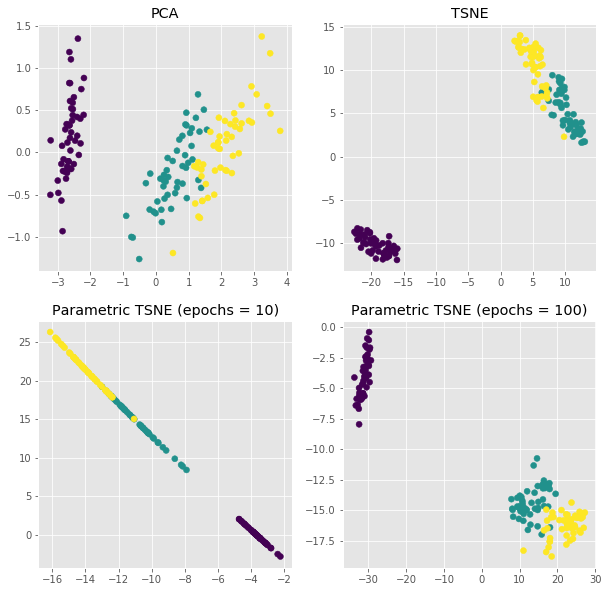

In [20]:
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
plt.title("PCA")

plt.subplot(222)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target)
plt.title("TSNE")

plt.subplot(223)
plt.scatter(X_ptsne_E1[:, 0], X_ptsne_E1[:, 1], c=iris.target)
plt.title("Parametric TSNE (epochs = 10)")

plt.subplot(224)
plt.scatter(X_ptsne_5E2[:, 0], X_ptsne_5E2[:, 1], c=iris.target)
plt.title("Parametric TSNE (epochs = 100)")


plt.show()

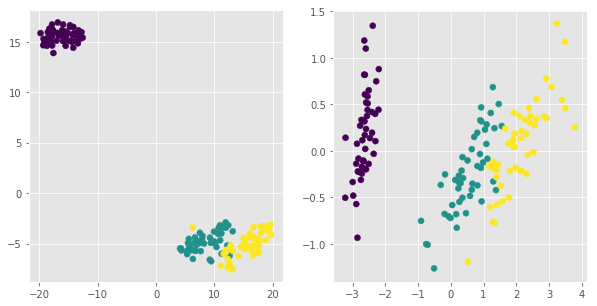

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target)

plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)

plt.show()